In [1]:
import pandas as pd
df = pd.read_csv('transfusion.txt', header=None)
cols = ['Recency','Frequency','Monetary','Time','Status']
df.columns = cols

In [2]:
df.head()

,Recency,Frequency,Monetary,Time,Status
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
df.tail()

,Recency,Frequency,Monetary,Time,Status
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


c:\users\aman sharif\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


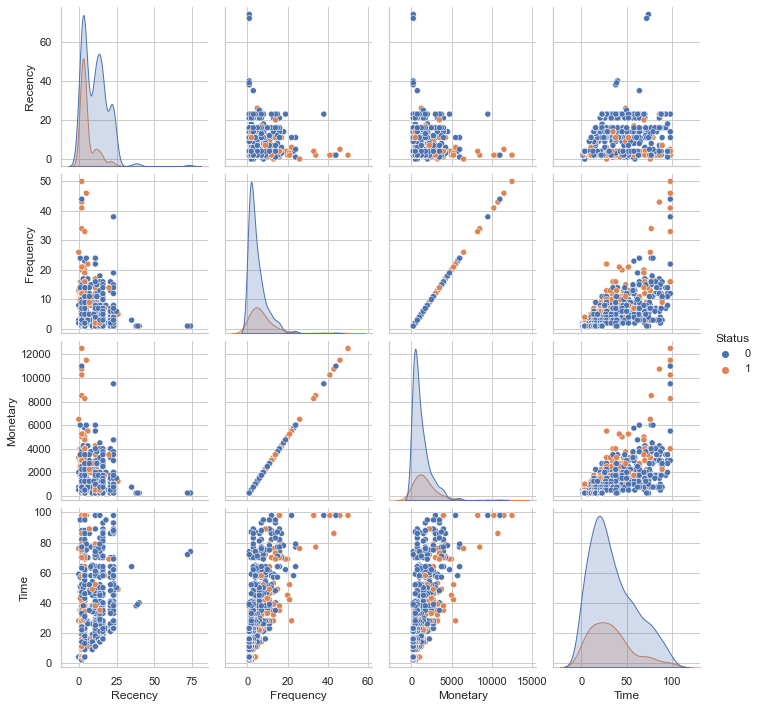

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(df.dropna(), size =2.5, hue = 'Status')

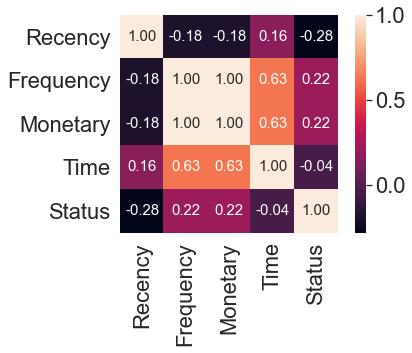

In [5]:
import numpy as np
cm = np.corrcoef(df.values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)

In [6]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=25):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [7]:
X = df[['Recency']].values
y = df['Status'].values

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

In [9]:
lr = LinearRegressionGD()
lr.fit(X_std, y)

In [10]:
print('Slope: %.3f' % lr.w_[1])

Slope: -0.119


In [11]:
print('Intercept: %.3f' % lr.w_[0])

Intercept: 0.238


In [12]:
 new_val = 23
new_class = lr.predict(new_val)
print("Class is %d" %new_class)

Class is -2


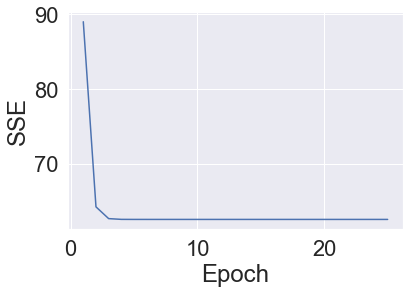

In [13]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [14]:
def reg_plot(X,y,model):
    plt.scatter(X,y, c = 'blue')
    plt.plot(X,model.predict(X),color = 'red')
    return None

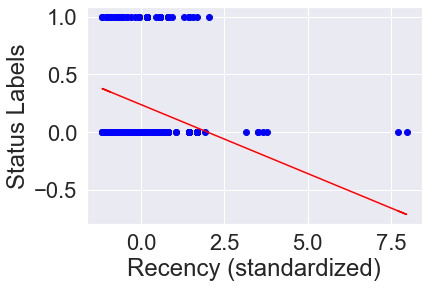

In [15]:
reg_plot(X_std, y, lr)
plt.xlabel('Recency (standardized)')
plt.ylabel('Status Labels')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X,y)

LinearRegression()

In [17]:
print('Slope: %.3f' % slr.coef_[0])

Slope: -0.015


In [18]:
print('Intercept: %.3f' %slr.intercept_)

Intercept: 0.378


In [19]:
new_val = 23
new_class = slr.predict([[new_val]])
print("Class is %d" %new_class)

Class is 0


Text(0.5, 0, 'Recency')

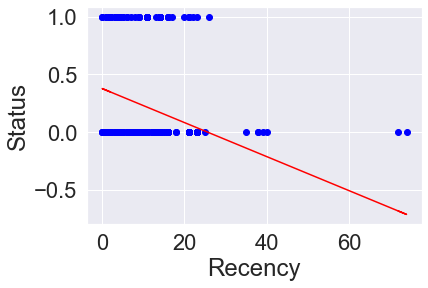

In [20]:
reg_plot(X,y,slr)
plt.ylabel("Status")
plt.xlabel("Recency")

In [21]:
slr.score(X,y)

0.07832658295937067

In [22]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,residual_threshold=5.0,random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5.0)

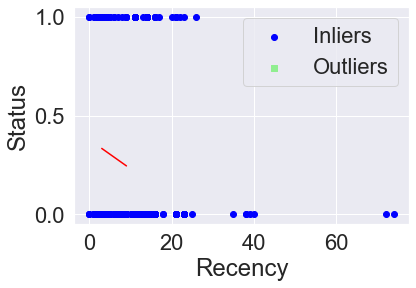

In [23]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Recency')
plt.ylabel('Status')
plt.legend(loc='upper right')
plt.show()

In [24]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])

Slope: -0.015


In [25]:
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Intercept: 0.378


In [26]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['Status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

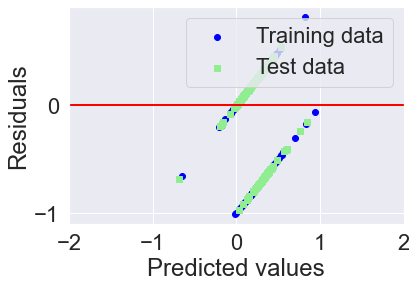

In [27]:
plt.scatter(y_train_pred, y_train_pred - y_train,c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=-2, xmax=2, lw=2, color='red')
plt.xlim([-2, 2])
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

MSE train: 0.154, test: 0.168
